In [2]:
import os
import sys 
sys.path.append('../../utilities/')
import data_utils, evaluation_utils
sys.path.append('../../src')
from dataset_class import dataset
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

GM12878_signals_names = ['DNase', 'H3K4me2', 'H3K27ac', 'H2A.Z', 'H3K9me3', 'H3K4me1', 'H3K27me3', 'H3K9ac', 'H3K4me3', 'H3K36me3', 'H3K79me2', 'H4K20me1']
GM12878_dataset = dataset('GM12878', 'hg19', 100000, '../../data/GM12878/hg19/Hi-C/GSE63525_GM12878_insitu_primary_30.hic',
                 '../../utilities/juicer_tools_1.22.01.jar', '../../data/GM12878/hg19/Hi-C/res100000',
                 GM12878_signals_names, '../../data/GM12878/hg19/genomic-assays/bin_100000/', 
                  '../../data/GM12878/hg19/res100000_datasets/',
                  '../../data/', '../../utilities/config.json')
GM12878_dataset.load_pos2ind_and_ind2pos_maps('../../data/valid_bins/hg19/GM12878_100000_bins.txt')

/home/nedooshki/miniconda3/envs/IChDA/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
GM12878_dataset.read_annotation('../../data/GM12878/hg19/annotations/GSE63525_GM12878_subcompartments.bed', 'SC')

# sci graph

In [5]:
embeddings = {}
for d in [2,4,8,16,32,64,128]:
    for s in [1,5,10,50,100]:
        file_path = '../../data/GM12878/hg19/res100000_datasets/embeddings/sci/sci_d{}_s{}_o{}.txt'.format(d,s,2)
        embeddings[d,s] = GM12878_dataset.read_line_embedding(file_path, d, 0)
        embeddings[d,s]['SC'] = [GM12878_dataset.labels['SC'][i] for i in embeddings[d,s]['index']]

In [8]:
SI_df = []
for key in embeddings:
    d = key[0]
    s = key[1]
    SI = metrics.silhouette_score(embeddings[key][embeddings[key]['SC'].values!=None][['emb{}'.format(e) for e in np.arange(1,d+1)]], 
                         embeddings[key][embeddings[key]['SC'].values!=None]['SC'], metric='euclidean')
    SI_df.append({'d':d, 's':s, 'SI':SI})
SI_df = pd.DataFrame(SI_df)

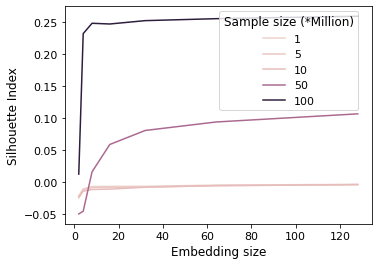

In [18]:
fig = plt.figure(figsize=(5.5,4))
ax = sns.lineplot(x="d", y="SI", hue="s", data=SI_df)
ax.set_xlabel('Embedding size', size = 12)
ax.set_ylabel('Silhouette Index', size = 12)
plt.legend(fontsize=11, title='Sample size (*Million)', title_fontsize = 12, 
           loc = 'center', bbox_to_anchor = [0.73, 0.75])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#fig.savefig(os.path.join('results/', "hyper_d_s.png"), 
#            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)

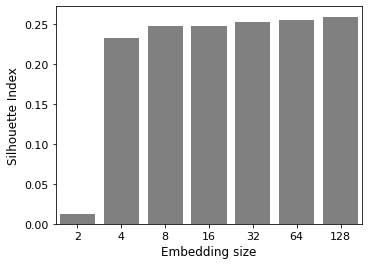

In [20]:
fig = plt.figure(figsize=(5.5,4))
ax = sns.barplot(data=SI_df[SI_df['s']==100], x = 'd', y = 'SI', color = 'Grey')
ax.set_xlabel('Embedding size', size = 12)
ax.set_ylabel('Silhouette Index', size = 12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#fig.savefig(os.path.join('results/', "hyper_d.png"), 
#            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)

# oe graph

In [4]:
embeddings = {}
for d in [2,4,8,16,32,64,128]:
    for s in [1,5,10,50,100]:
        file_path = '../../data/GM12878/hg19/res100000_datasets/embeddings/oe/oe_d{}_s{}_o{}.txt'.format(d,s,2)
        embeddings[d,s] = GM12878_dataset.read_line_embedding(file_path, d, 0)
        embeddings[d,s]['SC'] = [GM12878_dataset.labels['SC'][i] for i in embeddings[d,s]['index']]

In [5]:
SI_df = []
for d in [2,4,8,16,32,64,128]:
    for s in [1,5,10,50,100]:
        SI = metrics.silhouette_score(embeddings[d,s][GM12878_dataset.labels['SC'] != None][['emb{}'.format(e) for e in np.arange(1,d+1)]], 
                             GM12878_dataset.labels['SC'][GM12878_dataset.labels['SC'] != None], metric='euclidean')
        SI_df.append({'d':d, 's':s, 'SI':SI})
SI_df = pd.DataFrame(SI_df)

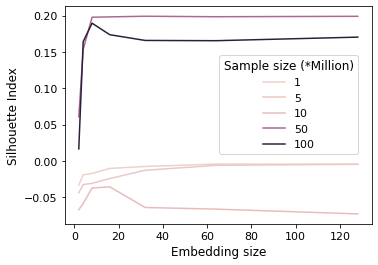

In [10]:
fig = plt.figure(figsize=(5.5,4))
ax = sns.lineplot(x="d", y="SI", hue="s", data=SI_df)
ax.set_xlabel('Embedding size', size = 12)
ax.set_ylabel('Silhouette Index', size = 12)
plt.legend(fontsize=11, title='Sample size (*Million)', title_fontsize = 12, 
           loc = 'center', bbox_to_anchor = [0.73, 0.55])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
fig.savefig(os.path.join('results/', "hyper_d_s.png"), 
            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

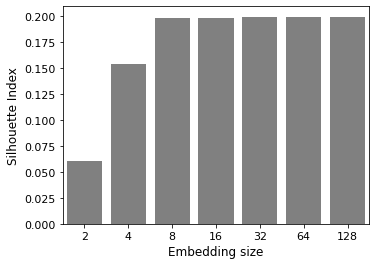

In [12]:
fig = plt.figure(figsize=(5.5,4))
ax = sns.barplot(data=SI_df[SI_df['s']==50], x = 'd', y = 'SI', color = 'Grey')
ax.set_xlabel('Embedding size', size = 12)
ax.set_ylabel('Silhouette Index', size = 12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# comparison with Fit-Hi-C graph

In [18]:
embeddings_path = '../../data/GM12878/hg19/res100000_datasets/embeddings/'
embeddings_df = {}
for input_type in ['oe', 'fithic']:
    for order in [1,2]:
        embedding_name = '{}/{}_d8_s50_o{}.txt'.format(input_type, input_type, order)
        embedding_path = os.path.join(embeddings_path, embedding_name)
        embeddings_df[input_type, order] = GM12878_dataset.read_line_embedding(embedding_path, 8, 0)
        embeddings_df[input_type, order]['SC'] = [GM12878_dataset.labels['SC'][i] for i in embeddings_df[input_type, order]['index']]
        embeddings_df[input_type, order] = embeddings_df[input_type, order][embeddings_df[input_type, order]['SC'].values!=None]

In [20]:
emb_names = ['emb{}'.format(e) for e in np.arange(1,9)]
emb_SIs = []
for input_type in ['oe', 'fithic']:
    for order in [1,2]:
        SI = metrics.silhouette_score(embeddings_df[input_type,order][emb_names], 
                                 embeddings_df[input_type,order]['SC'], metric='euclidean')
        if input_type == 'oe':
            input_type2 = 'O/E'
        else:
            input_type2 = 'Fit-Hi-C'
        if order == 1:
            order2 = '1st'
        else:
            order2 = '2nd'
            
        emb_SIs.append({'input': input_type2, 'order': order2, 'SI': SI})
emb_SIs = pd.DataFrame(emb_SIs)

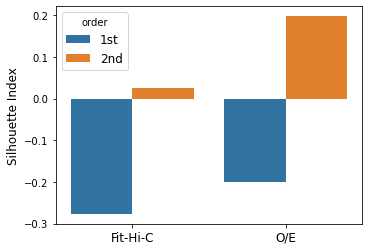

In [21]:
fig = plt.figure(figsize=(5.5,4))
ax = sns.barplot(data = emb_SIs.iloc[[2,3,0,1],:], x = 'input', y = 'SI', hue = 'order')
ax.set_xlabel('')
ax.set_ylabel('Silhouette Index', fontsize = 12)
ax.set_xticklabels(['Fit-Hi-C', 'O/E'], fontsize=12)
ax.legend(loc='upper left', prop={'size': 12}, title = 'order')

In [25]:
final_embedding = GM12878_dataset.read_line_embedding('../../data/GM12878/hg19/res100000_datasets/embeddings/oe/oe_d8_s50_o2.txt', 8, 1)

In [24]:
final_embedding[['emb{}'.format(e) for e in np.arange(1,9)]].to_csv('../../data/GM12878/hg19/res100000_datasets/structural_signals.txt', sep = "\t", header = None, index = False)

In [28]:
final_embedding['SC'] = [GM12878_dataset.labels['SC'][i] for i in final_embedding['index']]

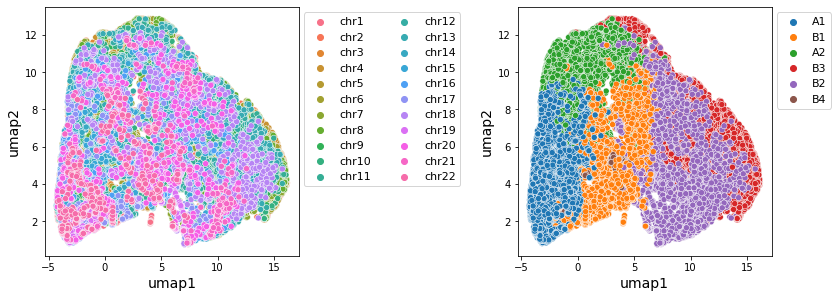

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12,4.5))

sns.scatterplot(data = final_embedding[final_embedding['SC']!='NA'], x = 'umap1', y = 'umap2', hue = 'chr_name', ax = axs[0])
axs[0].set_xlabel('umap1', size = 14)
axs[0].set_ylabel('umap2', size = 14)
axs[0].legend(loc='upper left',bbox_to_anchor=(1,1), ncol = 2, prop={'size': 11})

sns.scatterplot(data = final_embedding[final_embedding['SC']!='NA'], x = 'umap1', y = 'umap2', hue = 'SC', ax = axs[1])
axs[1].set_xlabel('umap1', size = 14)
axs[1].set_ylabel('umap2', size = 14)
axs[1].legend(loc='upper left',bbox_to_anchor=(1,1), prop={'size': 11})

fig.tight_layout(pad=2.0)
fig.savefig(os.path.join('results', "line_2nd_umap.png"), 
            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)